In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mc_data = pd.read_json('DataSets/SciFi_200000_Clean_TrackStudy.json')
real_data = pd.read_json('DataSets/SciFi_200000_AllHits.json')

In [3]:
###### Data columns
i = 0
print('\n Clean TrackStudy Dataset:\n')
for val in mc_data.columns:
    print(i," ",val)
    i = i + 1
print('\n AllHits Dataset:\n')
# Data columns
i = 0
for val in real_data.columns:
    print(i," ",val)
    i = i + 1


 Clean TrackStudy Dataset:

0   MCParticleID
1   MC_Hit_X
2   MC_Hit_Y
3   MC_Hit_Z
4   PrHit_LHCbID
5   PrHit_Xat0
6   PrHit_Zat0
7   PrHit_isX
8   PrHit_planeCode
9   PrHit_w2
10   PrHit_yMax
11   PrHit_yMin
12   PrHit_zone
13   event

 AllHits Dataset:

0   Event
1   Hit_LHCbID
2   Hit_Xat0
3   Hit_YMax
4   Hit_YMin
5   Hit_Zat0
6   Hit_dxDy
7   Hit_dzDy
8   Hit_isX
9   Hit_planeCode
10   Hit_w
11   Hit_zone
12   run


In [4]:
mc_hits = mc_data.values
real_hits = real_data.values

In [5]:
# Create X and Y matrices for the future model
length = mc_hits.shape[0]

X = np.zeros((length, 1))
Y = np.zeros((length, 11))

i = 0
empty_particles = []
for i in range(0,length):
    
    if ((len(mc_hits[i][5]) > 1)):
        # Get the first element of the hit, in the first layer
        X[i] = mc_hits[i][5][0]
        
        # Get only the first element if there are several repeated with small differences
        j = 0
        extra_hits = mc_hits[i][5]
        try:
            while (np.abs(extra_hits[j] - extra_hits[j + 1]) < 5):
                j += 1
            j += 1
        except IndexError as e:
            X[i] = np.zeros(1)
            continue
        
        # Get all hits from the given particle which are not located in the first layer
        extra_hits = mc_hits[i][5][j:]
        actual_pos = 0
        j = 0
        try:
            while (j < len(extra_hits)):
                Y[i][actual_pos] = extra_hits[j]
                # Same as above, get only the first element in case there are several hits with similar X position
                while (j + 1 < len(extra_hits) and np.abs(extra_hits[j] - extra_hits[j + 1]) < 3):
                    j += 1
                actual_pos += 1
                j += 1
        except IndexError:
            X[i] = np.zeros(1)
            Y[i] = np.zeros(11)

In [6]:
# Removing empty values, as some hits in the mc_hits dataset do not contain readings (PrHit...)
Y = Y[Y[:,0] != 0]
X = X[X[:,0] != 0]

In [7]:
def showTracksMCHits(electrons, elev, angle, max):
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0
    # Iterate through all the particles keys obtained 
    for particle in mc_hits:
        
        if (electrons & (particle[0] == 11) & (particle[12] == 0)):
            continue
        
        X = np.array(particle[1]).astype(float)
        Y = np.array(particle[2]).astype(float)
        Z = np.array(particle[3]).astype(float)
        
        ax.plot(X, Z, Y)
            
        i = i + 1
        if i == max:
            break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    plt.show()

In [8]:
print(X.shape)
print(Y.shape)

(140936, 1)
(140936, 11)


In [9]:
def showPredictedTracks(min, max):
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    
    # Iterate through all the particles keys obtained 
    for i in range(min,max):
        X = np.array(mc_hits[i][5]).astype(float)
        Y = np.array(mc_hits[i][6]).astype(float)
        ax.plot(X, Y)
            
    ax.grid()
    plt.show()

In [10]:
def removeSimilar(array, max):
    clean = np.zeros(max)
    j = 0
    actual_pos = 0
    while (j < len(array)):
        clean[actual_pos] = array[j]
        while (j + 1 < len(array) and np.abs(array[j] - array[j + 1]) < 3):
            j += 1
        actual_pos += 1
        j += 1
    return clean

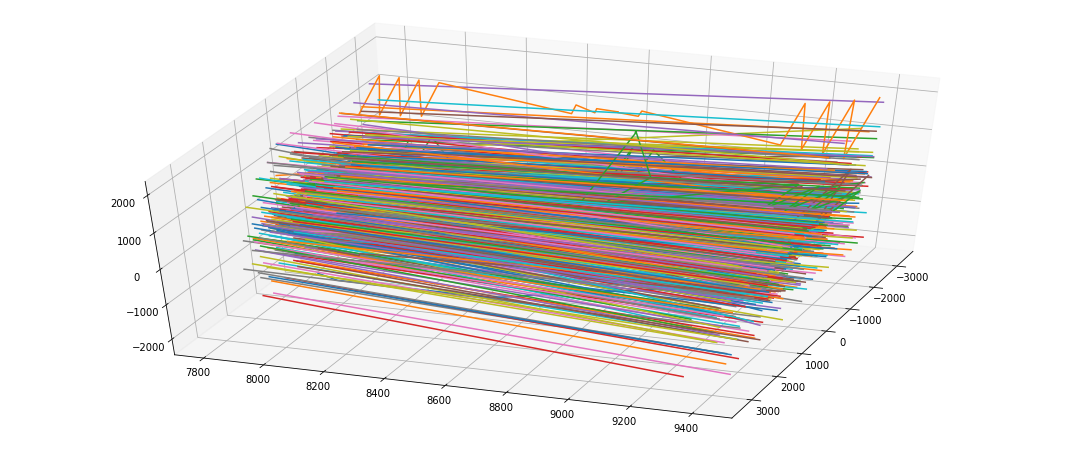

In [11]:
showTracksMCHits(True, 45,20,1000)

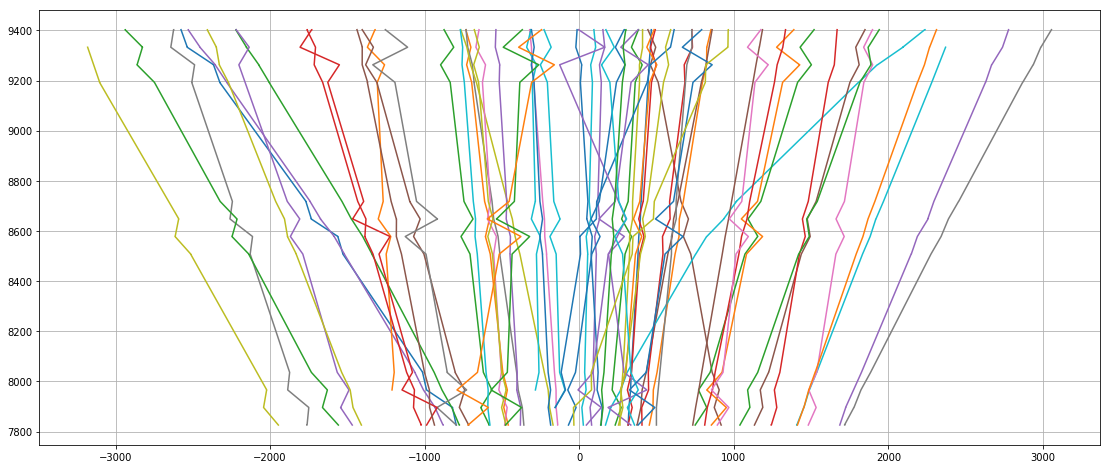

In [12]:
showPredictedTracks(0,100)

In [15]:
def showPredictedAndReal(min, max):
    
    if min < 0:
        min = max - 1
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    
    # Iterate through all the particles keys obtained 
    for i in range(min,max):
        X = np.array(mc_hits[i][1]).astype(float)
        Y = np.array(mc_hits[i][3]).astype(float)
        ax.plot(X, Y)
        textPos_X = X[int(len(X) / 2)]
        textPos_Y = Y[int(len(Y) / 2)]
        X = np.array(mc_hits[i][5]).astype(float)
        Y = np.array(mc_hits[i][6]).astype(float)
        ax.plot(X, Y)
        if (len(X) == 0):
            print('MCID: %d ' % mc_hits[i][0])
            ax.text(textPos_X + 10, textPos_Y, 'No prediction', fontsize=12)
            
    ax.grid()
    plt.show()

MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 11 
MCID: 11 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 11 
MCID: 11 
MCID: 211 
MCID: 11 
MCID: 321 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 2212 
MCID: 211 
MCID: 2212 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 211 
MCID: 211 
MCID: 321 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 321 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 321 
MCID: 211 
MCID: 13 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 2212 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 2212 
MCID: 2212 
MCID: 211 
MCID: 11 
MCID: 211 
MCID: 11 
MCID: 11 
MCID: 211 
MCID: 11 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 11 
MCID: 2212 
MCID: 2212 
MCID: 211 
MCID: 211 
MCID: 2212 
MCID: 2212 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 211 
MCID: 2212 
MCID:

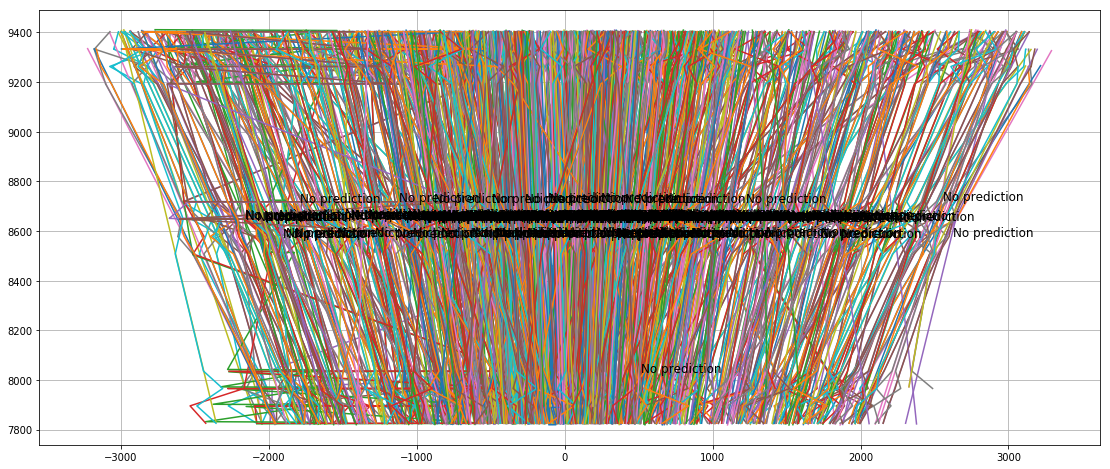

In [17]:
showPredictedAndReal(0,1000)

In [ ]:
listIds = []
for hit in mc_hits:
    for ids in hit[4]:
        listIds.append(ids)

In [ ]:
print("Length of Ids in All MCHits in TrackStudy dataset: %d" % len(listIds))
print("Length of unique Ids: %d" % len(np.unique(listIds)))

In [ ]:
print("Min: %d; Max: %d" % (min(listIds), max(listIds)))        
print("Available Ids %d" % (max(listIds) - min(listIds)))

In [ ]:
events = np.unique(real_hits[:,0])
hitsByEvent = []
for event in events:
    hitsByEvent.append(real_hits[real_hits[:,0] == event])

In [ ]:
repeated_Ids = []
for i in range(0,10000):
    group = real_hits[real_hits[:,1] == real_hits[i][1]]
    if (len(group) > 1):
        for event in group:
            repeated_Ids.append(event)
repeated_Ids = np.array(repeated_Ids)

In [ ]:
for event in hitsByEvent:
    print(len(event[:,1]))
    print(len(np.unique(event[:,1])))

In [ ]:
sum = 0
for hit in mc_hits:
    sum += len(hit[4])
sum